# Prediction Models

In this step we will be experimenting with different prediction models!<br>
We wil be tracking their performance using the following metrics:

- **Mean Squared Error (MSE)**, average of the squared differences between predicted values and actual values; gives a more general idea of the error magnitude and penalizes large errors more heavily.


- **Root Mean Squared Error (RMSE)**, root of the mean squared error; provides a more interpretable version of the MSE.


- **Mean Absolute Error (MAE)**, average absolute differences between predicted values and actual values; provides the average magnitude of errors without considering their direction (whether the prediction was higher or lower).


- **Mean Absolute Percentage Error (MAPE)**, average absolute percentage errors between predicted values and actual values; shows the percentage error for each prediction, which makes it easier to interpret in relative terms, telling hou much our predictions are off on average.


- **R² Score (coefficient of determination)**, measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (the features)

In the end, we will build a table with all the models and their respective metrics, compare the results, and finally choose the model we think is more fitting for this task!

This notebook is divided in the following parts:
- 0. Libraries
- 1. Train, Validation and Test Split
- 2. Linear Regression
- 3. Decision Trees
- 4. Random Forest
- 5. Support Vector Machine
- 6. XGBoost
- 7. MultiLayer Perceptron
- 8. Model Comparison

# 

# 0. Libraries

In [1]:
import os
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 

# 1. Train, Validation and Test Split

Our first step is to separate the data we have into 3 sets (training, validation and testing)!<br>

This will be done in a time-aware manner! This will be our split organization:
- Train: from 2010-02-01 to 2023-11-30
- Validation: from 2023-12-01 to 2023-12-31
- Test: from 2024-01-01 to 2024-01-31

In [2]:
#open the saved dataframe in pickle format
with open(os.path.join(os.getcwd(), "features/features_processed.pkl"), "rb") as ficheiro:
    features = pickle.load(ficheiro)
ficheiro.close()

In [3]:
#separate into train, validation and test
train = features[features["Year"]<1]
validation = train[train["Day_num"]>0.987872]
train = train[train["Day_num"]<=0.987872]
test = features[features["Year"]==1]

In [4]:
#check if the splitting was well done
print(train.shape[0] + validation.shape[0] + test.shape[0])
print(features.shape[0])

1665616
1665616


In [5]:
#separate into X and y
y = features['Next_day_close']
X = features.drop(columns='Next_day_close')

#separate into train, validation and test
y_train = train['Next_day_close']
X_train = train.drop(columns=['Next_day_close'])

y_val = validation['Next_day_close']
X_val = validation.drop(columns=['Next_day_close'])

y_test = test['Next_day_close']
X_test = test.drop(columns=['Next_day_close'])

In [6]:
#list to save the metrics
metricas = []

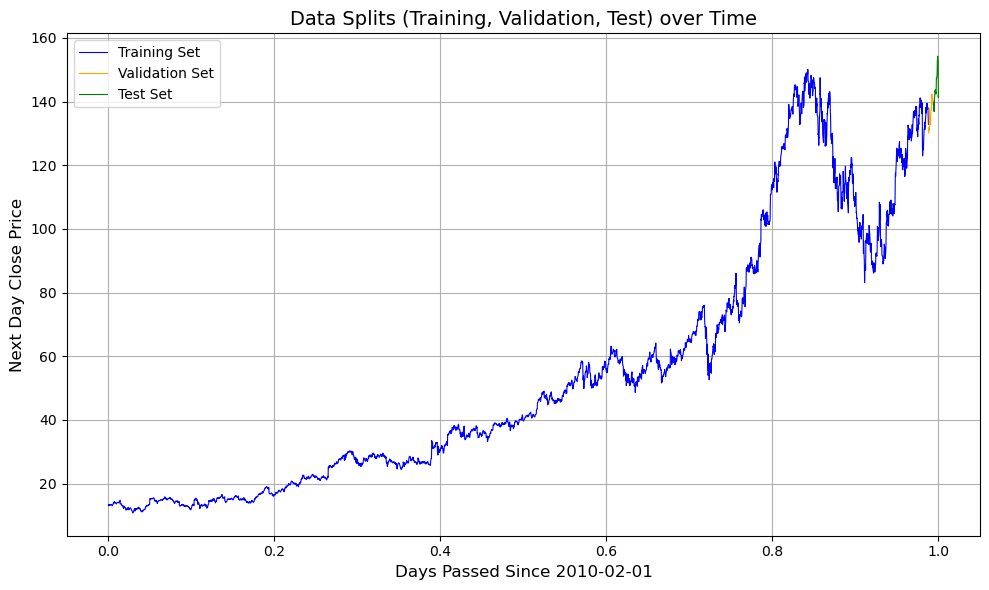

In [7]:
#splits of the data
part=features[features["Ticker_code"]==20]
part_train = part[part["Year"]<1]
part_val = part_train[part_train["Day_num"]>0.987872]
part_train = part_train[part_train["Day_num"]<=0.987872]
part_test = part[part["Year"]==1]
y_part_train = part_train["Next_day_close"]
X_part_train = part_train.drop(columns="Next_day_close")
y_part_val = part_val["Next_day_close"]
X_part_val = part_val.drop(columns="Next_day_close")
y_part_test = part_test["Next_day_close"]
X_part_test = part_test.drop(columns="Next_day_close")
#plot
plt.figure(figsize=(10, 6))
plt.plot(part_train["Day_num"], part_train["Next_day_close"], label='Training Set', color='blue', linestyle='-', linewidth=0.8)
plt.plot(part_val["Day_num"], part_val["Next_day_close"], label='Validation Set', color='orange', linestyle='-', linewidth=0.8)
plt.plot(part_test["Day_num"], part_test["Next_day_close"], label='Test Set', color='green', linestyle='-', linewidth=0.8)
plt.title('Data Splits (Training, Validation, Test) over Time', fontsize=14)
plt.xlabel('Days Passed Since 2010-02-01', fontsize=12)
plt.ylabel('Next Day Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 

# 2. Linear Regression

This was the more time-efficient model to train. The results were also surprisingly positive

In [8]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/lr_model.joblib")):
    lr = joblib.load('models/lr_model.joblib')
    
#else train the model
else:
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    joblib.dump(lr, 'models/lr_model.joblib')

In [9]:
# Predict on validation set
y_val_pred = lr.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val+(1e-10)))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 33.19
Root Mean Squared Error (RMSE): 5.76
--
Mean Absolute Error (MAE): 1.96
Mean Absolute Percentage Error (MAPE): 1.13%
--
R^2 Score: 1.00


In [10]:
# Predict on validation set
y_test_pred = lr.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


lr_metrics = {
    'Model': 'Linear Regression',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


lr_metrics_df = pd.DataFrame(lr_metrics, index=['Linear Regression'])
metricas.append(lr_metrics)

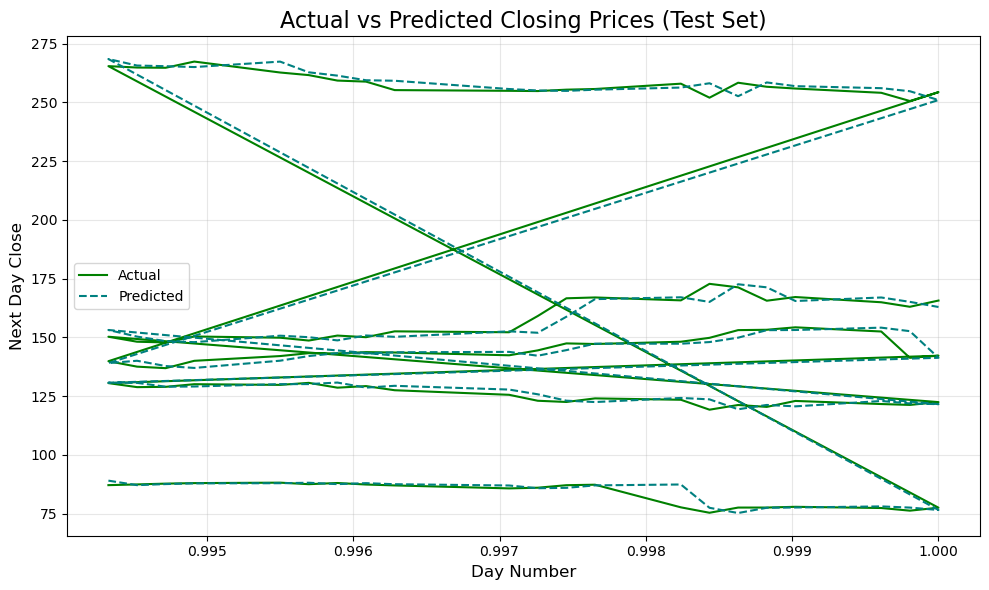

In [11]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = lr.predict(X_test_vis)

# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 3. Decision Trees

Athough it took a little more time to train than Linear Regression, the results from this model were a little worse than the prior model.

In [12]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/dt_model.joblib")):
    dt = joblib.load('models/dt_model.joblib')
    
#else train the model
else:
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    joblib.dump(dt, 'models/dt_model.joblib')

In [13]:
# Predict on validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val+(1e-10)))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 548.07
Root Mean Squared Error (RMSE): 23.41
--
Mean Absolute Error (MAE): 4.37
Mean Absolute Percentage Error (MAPE): 2.17%
--
R^2 Score: 1.00


In [14]:
# Predict on validation set
y_test_pred = dt.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


dt_metrics = {
    'Model': 'Decision Trees',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


dt_metrics_df = pd.DataFrame(dt_metrics, index=['Decision Trees'])
metricas.append(dt_metrics)

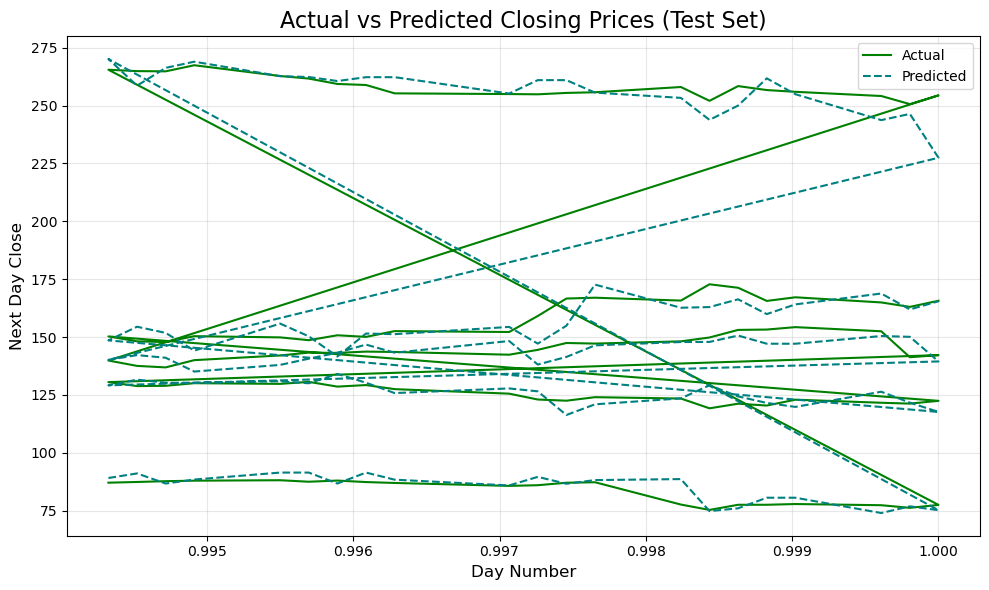

In [15]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = dt.predict(X_test_vis)
# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 4. Random Forest

This is an extremely heavy model. Our previous implementations lead to a lot of crashes and took a long time.<br>
As such, we decided to implement a more naive, yet effective approach,  with 10 estimators with a max depth of 10.

In [16]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/rf_model.joblib")):
    rf = joblib.load('models/rf_model.joblib')
    
#else train the model
else:
    rf = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1)
    rf.fit(X_train, y_train)
    joblib.dump(rf, 'models/rf_model.joblib')

In [17]:
# Predict on validation set
y_val_pred = rf.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val+(1e-10)))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 648.34
Root Mean Squared Error (RMSE): 25.46
--
Mean Absolute Error (MAE): 2.89
Mean Absolute Percentage Error (MAPE): 1.15%
--
R^2 Score: 1.00


In [18]:
# Predict on validation set
y_test_pred = rf.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


rf_metrics = {
    'Model': 'Random Forest',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


rf_metrics_df = pd.DataFrame(rf_metrics, index=['Random Forest'])
metricas.append(rf_metrics)

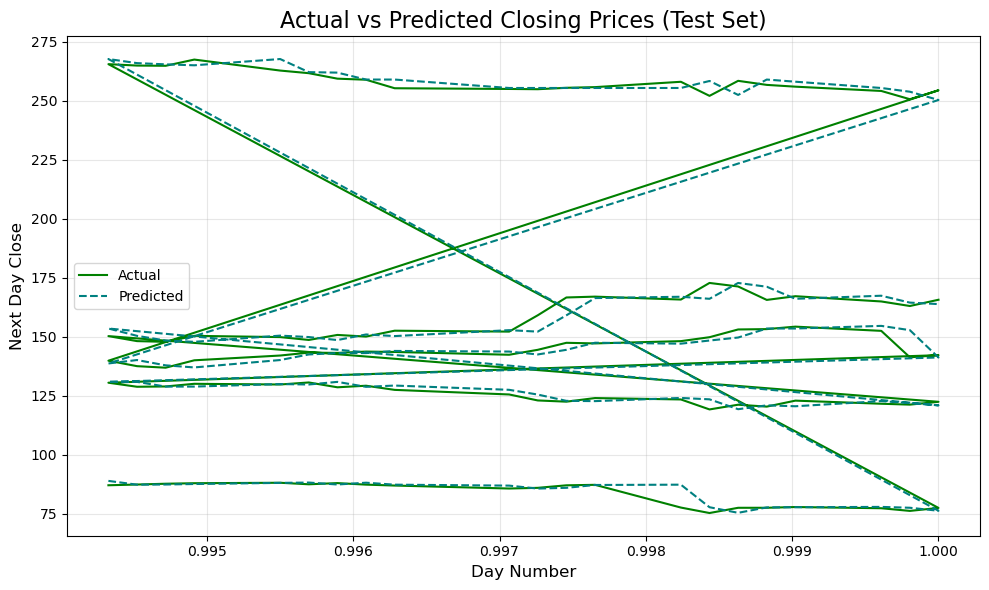

In [19]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = rf.predict(X_test_vis)
# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 5. Support Vector Machine

Another extremely complex model where we had to tone-down the complexity.<br>
The results were not optimal (AT ALL!!).

When we use standard scaler the results were totally acceptable, but now with minmax!!<br>
It got even worse when we removed the scaling from the target!

In [20]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/svm_model.joblib")):
    svm = joblib.load('models/svm_model.joblib')
    
#else train the model
else:
    svm = SVR(kernel='rbf', C=1, max_iter=10000, epsilon=0.05, verbose=1)
    svm.fit(X_train, y_train)
    joblib.dump(svm, 'models/svm_model.joblib')

In [21]:
#predict on validation set
y_val_pred = svm.predict(X_val)

#evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val+(1e-10)))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

#print
print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 241629.71
Root Mean Squared Error (RMSE): 491.56
--
Mean Absolute Error (MAE): 372.47
Mean Absolute Percentage Error (MAPE): 593.52%
--
R^2 Score: -0.65


In [22]:
# Predict on validation set
y_test_pred = svm.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


svm_metrics = {
    'Model': 'SVM',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


svm_metrics_df = pd.DataFrame(svm_metrics, index=['SVM'])
metricas.append(svm_metrics)

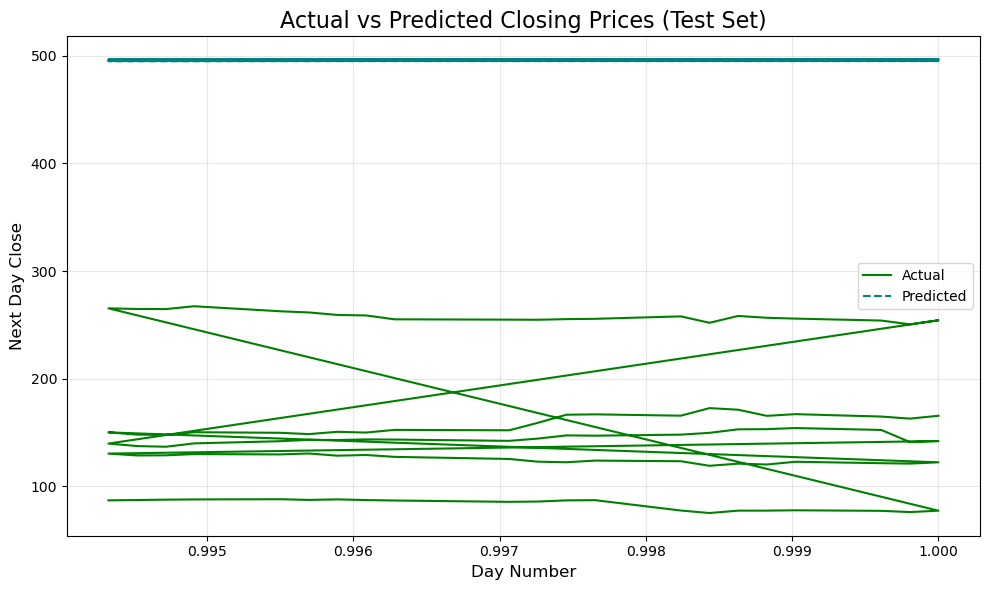

In [23]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = svm.predict(X_test_vis)
# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 6. XGBoost

Even with a lowered complexity, this model performed really well! Surprising, and a strong contender to be used in the final notebook!

In [24]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/xgb.joblib")):
    xgb = joblib.load('models/xgb_model.joblib')
    
#else train the model
else:
    xgb = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.05,
        max_depth=10,
        n_jobs=-1  
    )

    xgb.fit(X_train, y_train)
    joblib.dump(xgb, 'models/xgb_model.joblib')

In [25]:
# Predict on validation set
y_val_pred = xgb.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val+(1e-10)))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 1286.44
Root Mean Squared Error (RMSE): 35.87
--
Mean Absolute Error (MAE): 5.28
Mean Absolute Percentage Error (MAPE): 1.53%
--
R^2 Score: 0.99


In [26]:
# Predict on validation set
y_test_pred = xgb.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


xgb_metrics = {
    'Model': 'XGB',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


xgb_metrics_df = pd.DataFrame(xgb_metrics, index=['XGB'])
metricas.append(xgb_metrics)

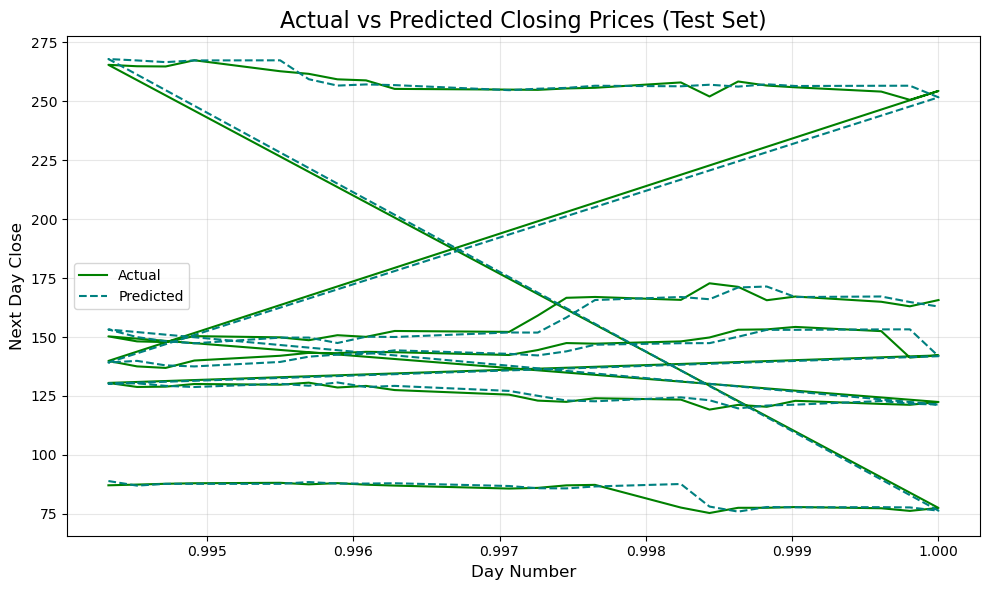

In [27]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = xgb.predict(X_test_vis)
# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 7. MultiLayer Peceptron

We do not have to build and tune a MLP from scratch, but for the record we already did that in another project (Urban Sound Recognition for the Curricular Unit Machine Learning 2).<br>
This implemention is a little more basic, but still works better than others!

In [28]:
#if the model has been trained
if os.path.exists(os.path.join(os.getcwd(), "models/mlp_model.joblib")):
    mlp = joblib.load('models/mlp_model.joblib')
    
#else train the model
else:
    mlp = MLPRegressor(hidden_layer_sizes=(256,), max_iter=25, activation='relu', solver='adam', verbose=1)
    mlp.fit(X_train, y_train)
    joblib.dump(mlp, 'models/mlp_model.joblib')

In [29]:
# Predict on validation set
y_val_pred = mlp.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
#
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / (y_val))) * 100
#
r2_val = r2_score(y_val, y_val_pred)

print("Validation Metrics!")
print()
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print("--")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.2f}%")
print("--")
print(f"R^2 Score: {r2_val:.2f}")

Validation Metrics!

Mean Squared Error (MSE): 60.42
Root Mean Squared Error (RMSE): 7.77
--
Mean Absolute Error (MAE): 3.22
Mean Absolute Percentage Error (MAPE): 3.35%
--
R^2 Score: 1.00


In [30]:
# Predict on validation set
y_test_pred = mlp.predict(X_test)

# Evaluate the model on the validation set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
#
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / (y_test+(1e-10)))) * 100
#
r2_test = r2_score(y_test, y_test_pred)


mlp_metrics = {
    'Model': 'MLP',
    'MSE': mse_test,
    'RMSE': rmse_test,
    'MAE': mae_test,
    'MAPE (%)': mape_test,
    'R2': r2_test
}


mlp_metrics_df = pd.DataFrame(mlp_metrics, index=['MLP'])
metricas.append(mlp_metrics)

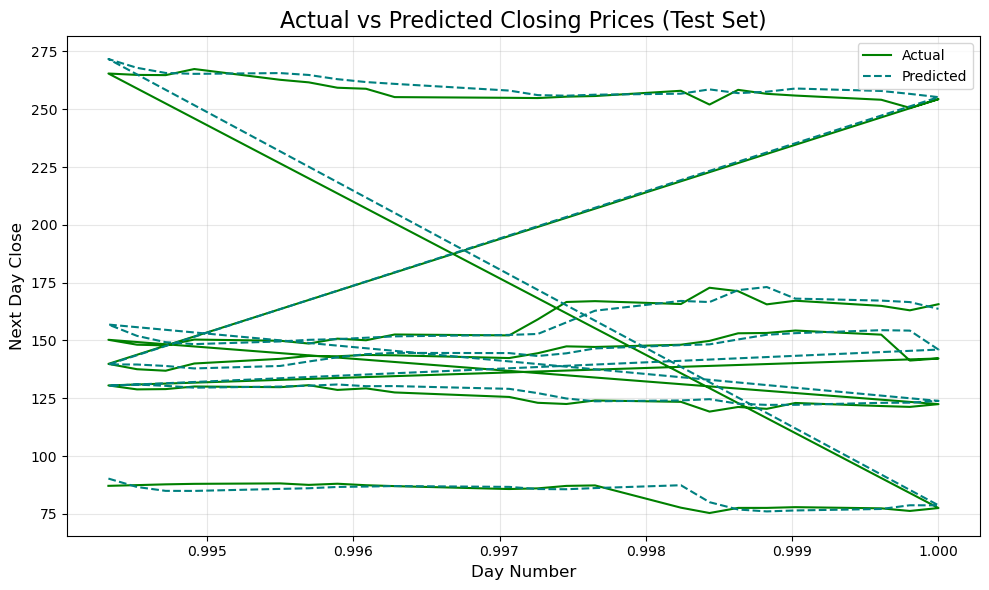

In [31]:
#separate 4 companies to visualize
ticker_codes = [0, 10, 20, 30, 40]

test_vis = features[features['Ticker_code'].isin(ticker_codes)]
test_vis = test_vis[test_vis["Year"]==1]

y_test_vis = test_vis['Next_day_close']
X_test_vis = test_vis.drop(columns='Next_day_close')

y_test_vis_pred = mlp.predict(X_test_vis)
# Plot actual vs predicted for the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test_vis["Day_num"], y_test_vis, label="Actual", color="green")
plt.plot(X_test_vis["Day_num"], y_test_vis_pred, label="Predicted", color="teal", linestyle="--")
plt.title("Actual vs Predicted Closing Prices (Test Set)", fontsize=16)
plt.xlabel("Day Number", fontsize=12)
plt.ylabel("Next Day Close", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 

# 7. Model Comparison

It is important to note that we tried to test even more models (like LSTM and SVM), but their overcomplexity lead to problems like dying kernels and overwhelming time consuption.As such, we decided to only leave these models!

We have the following results for the testing data!

In [32]:
metricas_df = pd.DataFrame(metricas)
metricas_df

,Model,MSE,RMSE,MAE,MAPE (%),R2
0,Linear Regression,57.158272,7.560309,2.109404,1.142023,0.999640
1,Decision Trees,1445.595241,38.020984,5.500451,2.304656,0.990890
2,Random Forest,1503.962736,38.780958,3.729915,1.184035,0.990522
3,SVM,251320.250887,501.318512,372.378707,587.186128,-0.583755
4,XGB,3337.803291,57.773725,7.393059,1.666523,0.978966
5,MLP,94.957041,9.744590,3.318398,2.791903,0.999402


What we are looking for is a model with **low values on every single metric, except on the R² Score**, where we should aim for a value as close to 1 as possible (1 is the biggest value).<br>
We must not forget that MSE is a squared value (bigger than reality) and RMSE is not squared, showing a more comprehensive value (average magnitude of prediction error, on the same scale as stock prices).<br>
MAE and MAPE are absolute values, so they are the easier to interpret. We need these values as low as we can possibly achieve! Usually, models that predict stock prices try to aim for a MAPE value lower than 10%.

As we can see, almost **all of our models performed relatively well**. This achievement can be attributed to the detailed and cautious feature extraction and feature creation processes.<br>
Unfortunately, and due to the reason we mentioned above, **SVM performance was really poor**. This could be related to the **need of hypertuning**, but since we do not have time to hypertune them all, and already obtained good performing models, we will discard it.

Our most appealing model would be the **Linear Regression**, which was the fastest to train, got the lowest MAPE, and performed really good in all the other metrics. Unfortunately, we feel that Linear Regression is a bit **too simple** for this task, and **fear overfitting**.

Being one of the best performing models in all metrics, and very appealing due to being a deep learning model, we felt a strong attraction towards **MLP**. As such, we decided to perform our final task with this model!<br>
In addition to this, we also decided to experiment with the **Random Forest** model to obtain the results, since we liked how it performed!<br>
After all, the more we experiment, the better :)